This notebook creates webnucleo reaction XML data from user-supplied input.  First install and import the necessary packages.

In [1]:
import sys
!{sys.executable} -m pip install --quiet wnutils
import wnutils.xml as wx
import matplotlib.pyplot as plt
import numpy as np

Read in the XML and retrieve the reaction data.

In [2]:
xml = wx.Xml("my_net.xml")

Now select the reactions to plot by XPath.  The XPath expression should select a number of individual reactions.

In [3]:
reactions = xml.get_reaction_data("[reactant = 'si28' and product = 'gamma']")

Now select the temperatures at which to plot the reaction rates.

In [4]:
t9s = np.logspace(-2, 1, 100)

Compute the rates and store them in a dictionary.

In [5]:
y = {}

for r in reactions:
    yy = []
    for t9 in t9s:
        yy.append(reactions[r].compute_rate(t9)) 
    y[r] = yy

Plot the reaction rates.

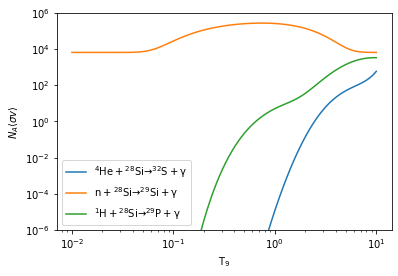

In [6]:
for r in reactions:
    plt.plot(t9s, y[reactions[r].get_string()], label=reactions[r].get_latex_string())

plt.xscale('log')
plt.yscale('log')

plt.ylim([1.e-6, 1.e6])

plt.xlabel('${\\rm T_9}$')
plt.ylabel('$N_A \\langle \\sigma v \\rangle$')

plt.legend()

Now compare rates from two compilations.

In [7]:
xml1 = wx.Xml("my_net.xml")
xml2 = wx.Xml("new_net.xml")

Select the reaction data to compare with XPath expressions.

In [8]:
reactions1 = xml1.get_reaction_data("[reactant = 'kr84' and reactant = 'n' and product = 'kr85']")
reactions2 = xml2.get_reaction_data("[reactant = 'kr84' and reactant = 'n' and product = ('kr85g' or 'kr85m')]")

Compute the rates.  Add strings.

In [9]:
y1 = []
for r in reactions1:
    yy = []
    for t9 in t9s:
        yy.append(reactions1[r].compute_rate(t9)) 
    y1.append((reactions1[r].get_latex_string(), yy))

y2 = []
for r in reactions2:
    yy = []
    for t9 in t9s:
        yy.append(reactions2[r].compute_rate(t9)) 
    y2.append((reactions2[r].get_latex_string(), yy))

Plot the rates.

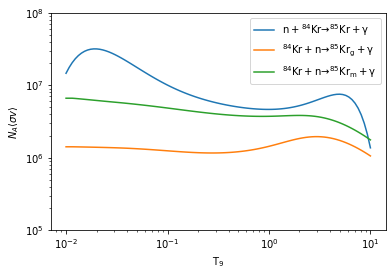

In [10]:
for i in range(len(y1)):
    plt.plot(t9s, y1[i][1], label=y1[i][0])
    
for i in range(len(y2)):
    plt.plot(t9s, y2[i][1], label=y2[i][0])

plt.xscale('log')
plt.yscale('log')

plt.ylim([1.e5, 1.e8])

plt.xlabel('${\\rm T_9}$')
plt.ylabel('$N_A \\langle \\sigma v \\rangle$')

plt.legend()